# **Семинар 1. Работа с изображениями**

## **Задания**

---

### **1. Загрузка и первичный анализ изображений**

**Цель:** освоить базовые операции чтения и визуализации изображений, познакомиться с их внутренним представлением в памяти.

**Инструкции:**

1. Загрузите три изображения в разных форматах: `.bmp`, `.png`, `.jpg`.
2. Выведите их размеры (`shape`), тип данных (`dtype`) и глубину каналов.
3. Выведите первые 5×5 элементов матрицы яркости для одного изображения.
4. Сравните размеры файлов и объясните различия между форматами.

**Подсказка:**

```python
import cv2
img = cv2.imread("example.png", cv2.IMREAD_UNCHANGED)
print(img.shape, img.dtype)
```

In [8]:
import cv2

!git clone https://github.com/mariapoz/IA-CV-

fatal: destination path 'IA-CV-' already exists and is not an empty directory.


1. Загрузите три изображения в разных форматах: .bmp, .png, .jpg.

array([[[ 41, 153, 176],
        [ 31, 131, 153],
        [ 41, 153, 176],
        ...,
        [183, 240, 238],
        [183, 240, 238],
        [183, 240, 238]],

       [[ 41, 153, 176],
        [ 31, 131, 153],
        [ 41, 153, 176],
        ...,
        [183, 240, 238],
        [183, 240, 238],
        [183, 240, 238]],

       [[ 41, 153, 176],
        [ 31, 131, 153],
        [ 41, 153, 176],
        ...,
        [183, 240, 238],
        [183, 240, 238],
        [183, 240, 238]],

       ...,

       [[100,  99,  90],
        [100,  99,  90],
        [ 76,  73,  66],
        ...,
        [ 84, 229, 248],
        [ 84, 229, 248],
        [ 84, 229, 248]],

       [[100,  99,  90],
        [ 76,  73,  66],
        [100,  99,  90],
        ...,
        [ 84, 229, 248],
        [ 84, 229, 248],
        [ 84, 229, 248]],

       [[100,  99,  90],
        [100,  99,  90],
        [100,  99,  90],
        ...,
        [ 84, 229, 248],
        [ 84, 229, 248],
        [ 84, 229, 248]]], dtype=uint8)
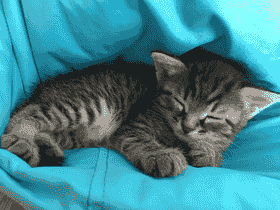

In [19]:
img_jpg = cv2.imread("IA-CV-/Pictures_for_seminar/example1.jpg", cv2.IMREAD_UNCHANGED)
img_png = cv2.imread("IA-CV-/Pictures_for_seminar/example.png", cv2.IMREAD_UNCHANGED)
img_bmp = cv2.imread("IA-CV-/Pictures_for_seminar/example.bmp", cv2.IMREAD_UNCHANGED)

img_rgb = cv2.cvtColor(img_png, cv2.COLOR_BGR2RGB)
img_rgb

2. Выведите их размеры (shape), тип данных (dtype) и глубину каналов.

In [20]:
print(img_jpg.shape, img_jpg.dtype)
print(img_png.shape, img_png.dtype)
print(img_bmp.shape, img_bmp.dtype)

(177, 284, 3) uint8
(210, 280, 3) uint8
(426, 640, 3) uint8


3. Выведите первые 5×5 элементов матрицы яркости для одного изображения.

In [21]:
cv2.cvtColor(img_jpg, cv2.COLOR_BGR2GRAY)[:5, :5]

array([[73, 59, 56, 58, 68],
       [52, 74, 79, 58, 58],
       [55, 52, 64, 82, 71],
       [54, 49, 44, 58, 58],
       [62, 53, 31, 40, 47]], dtype=uint8)

4. Сравните размеры файлов и объясните различия между форматами.

In [22]:
import os

kb = os.path.getsize(img_bmp) / 1024
print(kb)
# Объяснение коротко:
print("\nПочему размеры разные?")
print("BMP: без сжатия → большой размер")
print("PNG: сжатие без потерь → средний размер")
print("JPG: сжатие с потерями → маленький размер")

TypeError: only integer scalar arrays can be converted to a scalar index


### **2. Гистограмма яркости и линейное растяжение**

**Цель:** научиться визуализировать распределение интенсивностей и управлять контрастом изображения.

**Инструкции:**

1. Преобразуйте цветное изображение в оттенки серого (`cv2.cvtColor`).
2. Постройте гистограмму яркости (256 бинов).
3. Примените линейное растяжение диапазона яркости (нормализацию) с помощью `cv2.normalize` или вручную по формуле:
   $$
   I'(x, y) = \frac{I(x, y) - I_{\min}}{I_{\max} - I_{\min}} \times 255.
   $$
4. Повторно постройте гистограмму и визуально сравните результат.

**Ожидаемый результат:** увеличенный контраст и расширение гистограммы на весь диапазон 0–255.


Text(0.5, 1.0, 'Гистограмма яркости')

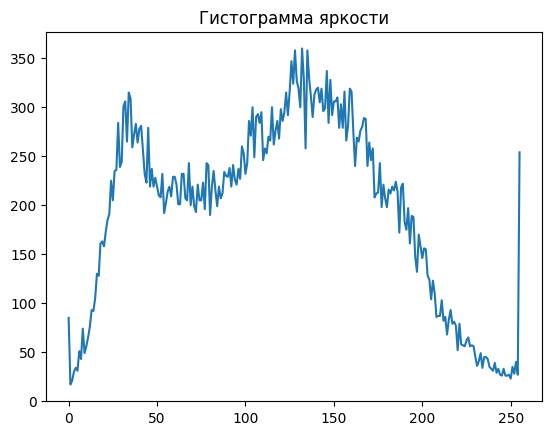

In [23]:
import matplotlib.pyplot as plt

cv2.cvtColor(img_jpg, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([img_jpg],[0],None,[256],[0,256])
plt.plot(hist); plt.title("Гистограмма яркости")

In [24]:
img = cv2.normalize(img_jpg, None, 0, 255, cv2.NORM_MINMAX)

Text(0.5, 1.0, 'Гистограмма яркости после нормализации')

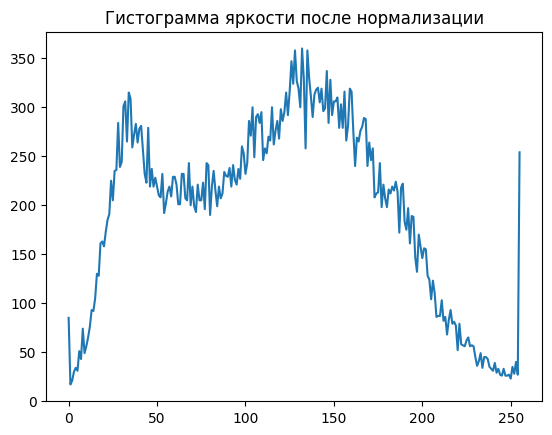

In [25]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist); plt.title("Гистограмма яркости после нормализации")

### **3. Эквализация гистограммы и локальный контраст**

**Цель:** изучить методы улучшения видимости деталей.

**Инструкции:**

1. Примените глобальную эквализацию гистограммы (`cv2.equalizeHist`) к тёмному изображению.
2. Сравните с адаптивной эквализацией CLAHE:

   ```python
   clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
   result = clahe.apply(gray)
   ```

3. Постройте гистограммы для каждого варианта (оригинал, equalized, CLAHE).
4. Сравните визуально и количественно (по стандартному отклонению интенсивности).

**Ожидаемый результат:** глобальная эквализация усиливает контраст во всём изображении, CLAHE — локально, не усиливая шум.


In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

In [37]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result = clahe.apply(gray)

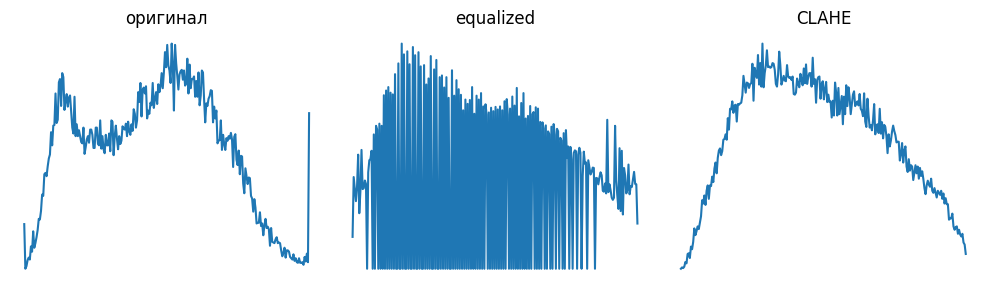

In [39]:
# гистограмм яркости
# оригинал, equalized, CLAHE
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# оригинал
hist = cv2.calcHist([img_jpg],[0],None,[256],[0,256])
axes[0].plot(hist)
axes[0].set_title('оригинал')
axes[0].axis('off')

# equalized
hist = cv2.calcHist([equalized],[0],None,[256],[0,256])
axes[1].plot(hist)
axes[1].set_title('equalized')
axes[1].axis('off')

# CLAHE
hist = cv2.calcHist([result],[0],None,[256],[0,256])
axes[2].plot(hist)
axes[2].set_title('CLAHE')
axes[2].axis('off')

plt.tight_layout()
plt.show()

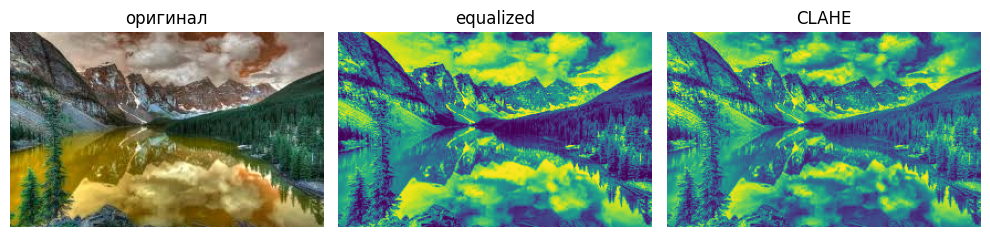

In [45]:
# сравнить визуально
# оригинал, equalized, CLAHE
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# оригинал
axes[0].imshow(img)
axes[0].set_title('оригинал')
axes[0].axis('off')

# equalized
axes[1].imshow(equalized)
axes[1].set_title('equalized')
axes[1].axis('off')

# CLAHE
axes[2].imshow(result)
axes[2].set_title('CLAHE')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [47]:
import numpy as np

std_1 = np.std(img)
std_2 = np.std(equalized)
std_3 = np.std(result)
print(std_1, std_2, std_3)

53.90790886605254 73.44097477938367 59.07908208361745



### **4. Цветовые каналы и цветовые пространства**

**Цель:** познакомиться с преобразованием между цветовыми моделями и разделением каналов.

**Инструкции:**

1. Загрузите цветное изображение и преобразуйте его в пространства **HSV**, **Lab**, **YCbCr**.
2. Разделите каналы и визуализируйте каждый отдельно.
3. Постройте гистограмму компоненты яркости (`V`, `L*`, `Y`) и сравните с гистограммой яркости в RGB.
4. Сделайте вывод: в каком пространстве лучше отделяются освещённость и цвет.

**Подсказка:**

```python
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
```


**H (Hue) - Оттенок (0-180 в OpenCV, 0-360 в теории)**

Цветовой тон (красный, синий, зеленый)

Циклический (красный в начале и конце)

**S (Saturation) - Насыщенность (0-255)**

Интенсивность цвета (0 - серый, 255 - максимально насыщенный)

**V (Value) - Яркость (0-255)**

Светлота (0 - черный, 255 - максимально яркий)

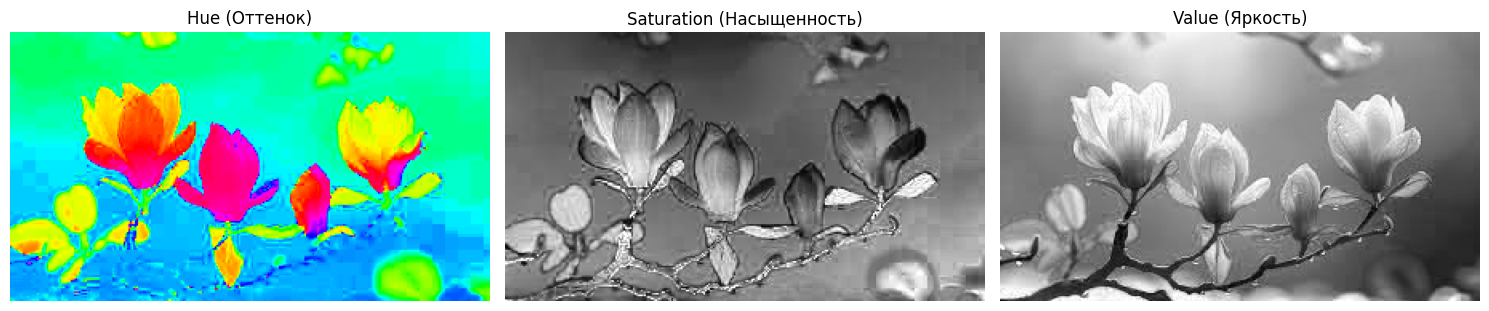

In [53]:
img = cv2.imread("IA-CV-/Pictures_for_seminar/example2.jpg", cv2.IMREAD_UNCHANGED)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Создание визуализаций
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Отображение канала H Hue (Оттенок)
axes[0].imshow(h, cmap='hsv')
axes[0].set_title('Hue (Оттенок)')
axes[0].axis('off')

# Отображение канала  S Saturation (Насыщенность)
axes[1].imshow(s, cmap='gray')
axes[1].set_title('Saturation (Насыщенность)')
axes[1].axis('off')

# Отображение канала V Value (Яркость)
axes[2].imshow(v, cmap='gray')
axes[2].set_title('Value (Яркость)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**L (Lightness) - Яркость (0-100)**

Светлота (0 - черный, 100 - белый)

**a (-128 до 127 в 8-битном представлении)**

От зеленого (-) до красного (+)

**b (-128 до 127)**

От синего (-) до желтого (+)

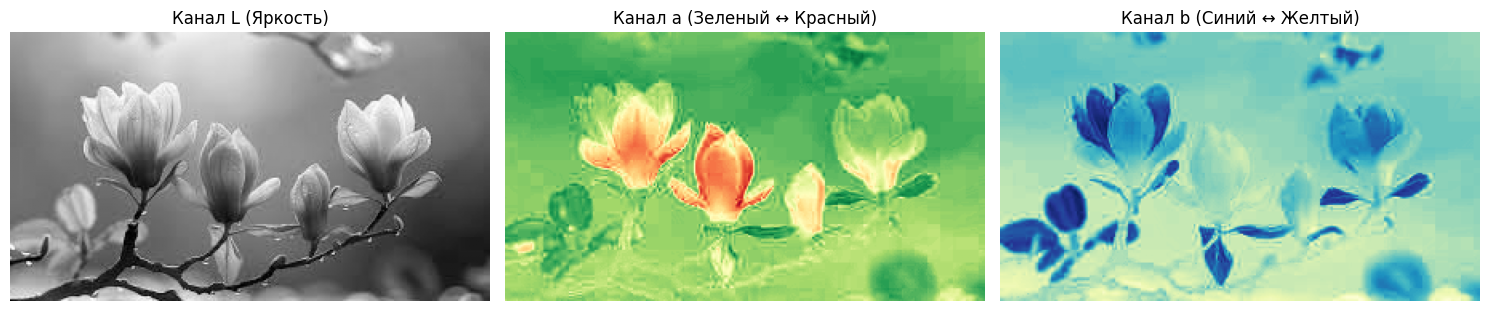

In [54]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

# Создание визуализаций
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Отображение канала L (яркость)
axes[0].imshow(L, cmap='gray')
axes[0].set_title('Канал L (Яркость)')
axes[0].axis('off')

# Отображение канала a (зеленый-красный)
axes[1].imshow(a, cmap='RdYlGn_r')  # Красный-желтый-зеленый
axes[1].set_title('Канал a (Зеленый ↔ Красный)')
axes[1].axis('off')

# Отображение канала b (синий-желтый)
axes[2].imshow(b, cmap='YlGnBu')  # Желтый-зеленый-синий
axes[2].set_title('Канал b (Синий ↔ Желтый)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**Y (Luma) - Яркостная составляющая (0-255)**

Основная информация о яркости

**Cb (Chrominance Blue) (0-255)**

Отклонение от серого в сине-желтом направлении

**Cr (Chrominance Red) (0-255)**

Отклонение от серого в красно-зеленом направлении

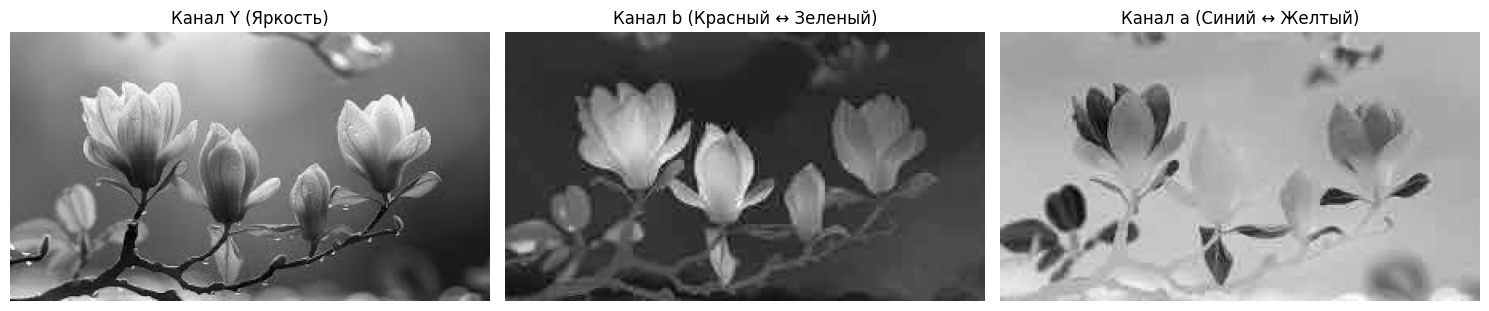

In [61]:
YCbCr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCbCr)  #COLOR_BGR2YCrCb

# Создание визуализаций
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Отображение канала Y (яркость)
axes[0].imshow(Y, cmap='gray')
axes[0].set_title('Канал Y (Яркость)')
axes[0].axis('off')

# Отображение канала Cr (красно-зеленый)
axes[1].imshow(Cr, cmap='gray')
axes[1].set_title('Канал b (Красный ↔ Зеленый)')
axes[1].axis('off')

# Отображение канала Cb (сине-желтый)
axes[2].imshow(Cb, cmap='gray')
axes[2].set_title('Канал a (Синий ↔ Желтый)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

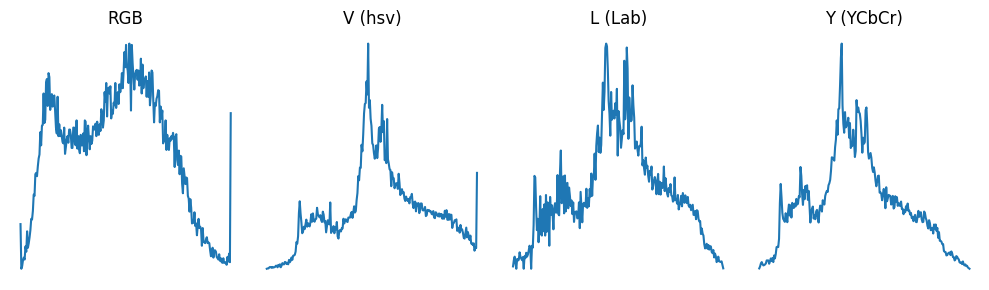

In [62]:
# гистограмм яркости
# RGB, V, L, Y
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

# RGB
hist = cv2.calcHist([img_jpg],[0],None,[256],[0,256])
axes[0].plot(hist)
axes[0].set_title('RGB')
axes[0].axis('off')

# v
hist = cv2.calcHist([v],[0],None,[256],[0,256])
axes[1].plot(hist)
axes[1].set_title('V (hsv)')
axes[1].axis('off')

# L
hist = cv2.calcHist([L],[0],None,[256],[0,256])
axes[2].plot(hist)
axes[2].set_title('L (Lab)')
axes[2].axis('off')

# Y
hist = cv2.calcHist([Y],[0],None,[256],[0,256])
axes[3].plot(hist)
axes[3].set_title('Y (YCbCr)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

Наилучшее разделение освещённости и цвета обеспечивает Lab пространство

### **5. Форматы и потери при сжатии**

**Цель:** изучить эффект компрессии JPEG и визуализировать потери данных.

**Инструкции:**

1. Сохраните изображение в JPEG с качеством 95, 60 и 30:

   ```python
   cv2.imwrite("img_60.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 60])
   ```

2. Загрузите обратно и вычислите абсолютную разницу с исходным:

   ```python
   diff = cv2.absdiff(img, restored)
   ```

3. Вычислите среднюю ошибку:
   $$
   \text{MSE} = \frac{1}{MN}\sum_{x,y} (I(x,y) - I'(x,y))^2
   $$

4. Отобразите `diff` как изображение ошибок и сравните визуально влияние степени сжатия.

**Ожидаемый результат:** при сильной компрессии появляются блочные артефакты и размытые границы.

In [80]:
cv2.imwrite("img_95.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 95])
cv2.imwrite("img_60.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 60])
cv2.imwrite("img_30.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 30])

img_95 = cv2.imread("img_95.jpg")
img_60 = cv2.imread("img_60.jpg")
img_30 = cv2.imread("img_30.jpg")

diff_95 = cv2.absdiff(img, img_95)
diff_60 = cv2.absdiff(img, img_60)
diff_30 = cv2.absdiff(img, img_30)

mse_95 = 1/img.size*(np.sum((img-img_95)**2))
mse_60 = 1/img.size*(np.sum((img-img_60)**2))
mse_30 = 1/img.size*(np.sum((img-img_30)**2))
print(mse_95, mse_60, mse_30, sep='\n')

10.47228835978836
31.082943121693123
39.62395502645503


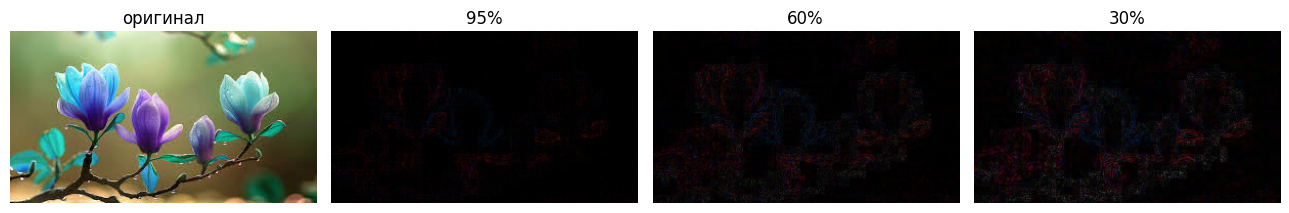

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(13, 5))

# оригинал
axes[0].imshow(img)
axes[0].set_title('оригинал')
axes[0].axis('off')

# 95%
axes[1].imshow(diff_95)
axes[1].set_title('95%')
axes[1].axis('off')

# 60%
axes[2].imshow(diff_60)
axes[2].set_title('60%')
axes[2].axis('off')

# 30%
axes[3].imshow(diff_30)
axes[3].set_title('30%')
axes[3].axis('off')

plt.tight_layout()
plt.show()


### **6. Частотное представление (дополнительное задание)**

**Цель:** закрепить понимание частотных характеристик изображения.

**Инструкции:**

1. Выполните 2D-Фурье-преобразование (`np.fft.fft2`) и визуализируйте амплитудный спектр.
2. Сконструируйте маску низкочастотного фильтра (например, круг радиуса 40 пикселей).
3. Примените фильтр к спектру и выполните обратное преобразование (`ifft2`).
4. Сравните исходное, отфильтрованное и спектральные представления.

**Ожидаемый результат:** низкочастотная фильтрация сглаживает изображение, уменьшая резкость; визуально спектр становится более компактным.
